<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [1]:
import tensorflow as tf
from scipy.io import loadmat

In [2]:
!wget --no-check-certificate 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'

--2021-02-28 16:00:10--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  48.3MB/s    in 4.6s    

2021-02-28 16:00:15 (37.5 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]



In [3]:
!wget --no-check-certificate 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'

--2021-02-28 16:00:17--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat’

test_32x32.mat      100%[===================>]  61.30M  32.9MB/s    in 1.9s    

2021-02-28 16:00:19 (32.9 MB/s) - ‘test_32x32.mat’ saved [64275384/64275384]



In [4]:
ls -lh

total 235M
drwxr-xr-x 1 root root 4.0K Feb 24 17:49 sample_data/
-rw-r--r-- 1 root root  62M Dec  6  2011 test_32x32.mat
-rw-r--r-- 1 root root 174M Dec  6  2011 train_32x32.mat


In [5]:
pwd

'/content'

In [6]:
# Load the dataset from your Drive folder

train = loadmat('/content/train_32x32.mat')
test = loadmat('/content/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [7]:
print(f'train keys: {train.keys()}')
train_x = train['X']
train_x = train_x / 255.0
train_y = train['y']
print(f'train_x shape: {train_x.shape}')
print(f'train_y shape: {train_y.shape}')

train keys: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
train_x shape: (32, 32, 3, 73257)
train_y shape: (73257, 1)


In [8]:
print(f'test keys: {test.keys()}')
test_x = test['X']
test_x = test_x / 255.0
test_y = test['y']
print(f'test_x shape: {test_x.shape}')
print(f'test_y shape: {test_y.shape}')

test keys: dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
test_x shape: (32, 32, 3, 26032)
test_y shape: (26032, 1)


 image labels: [4, 1, 9, 3, 5, 3, 3, 5, 2, 2, 10, 3]


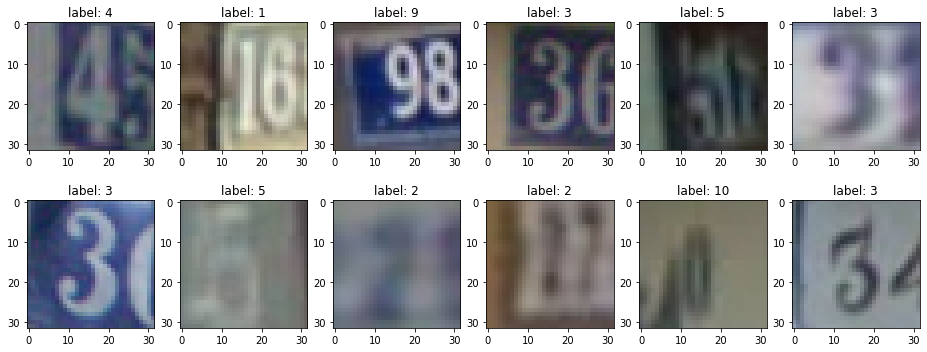

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 6, figsize=(16,6))
labels = []
for i in range(2):
    for j in range(6):
        indx = np.random.choice(train_y.shape[0])
        img = train_x[:,:,:,indx]
        ax[i,j].imshow(img)
        ax[i,j].set_title(f'label: {train_y[indx][0]}')
        labels.append(train_y[indx][0])
        #ax[i,j].set_axis_off()
print(f' image labels: {labels}')

In [10]:
train_gray_imgs = np.mean(train_x, axis=2)
test_gray_imgs = np.mean(test_x, axis=2)
print(f'train gray images shape: {train_gray_imgs.shape}')
print(f'test gray images shape: {test_gray_imgs.shape}')

train gray images shape: (32, 32, 73257)
test gray images shape: (32, 32, 26032)


 image labels: [8, 2, 3, 7, 1, 10, 7, 2, 2, 2, 5, 1]


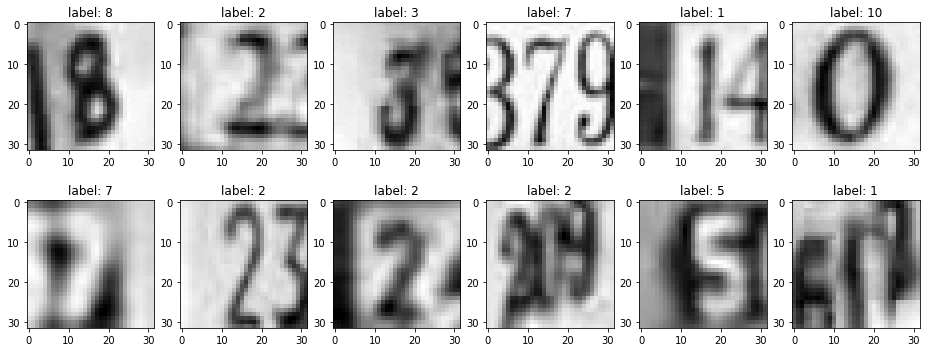

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2, 6, figsize=(16,6))
labels = []
for i in range(2):
    for j in range(6):
        indx = np.random.choice(train_y.shape[0])
        img = train_gray_imgs[:,:,indx]
        ax[i,j].imshow(img, cmap=plt.get_cmap('gray'))
        ax[i,j].set_title(f'label: {train_y[indx][0]}')
        labels.append(train_y[indx][0])
        #ax[i,j].set_axis_off()
print(f' image labels: {labels}')

In [12]:
train_gray_imgs = train_gray_imgs[..., np.newaxis]
print(f'train gray images shape: {train_gray_imgs.shape}')

test_gray_imgs = test_gray_imgs[...,np.newaxis]
print(f'test gray images shape: {test_gray_imgs.shape}')

train gray images shape: (32, 32, 73257, 1)
test gray images shape: (32, 32, 26032, 1)


In [13]:
## Let's rearrange the order of dimensions

train_gray_imgs = np.swapaxes(train_gray_imgs, 0, 2)
train_gray_imgs = np.swapaxes(train_gray_imgs, 1, 2)
print(f'train gray images shape: {train_gray_imgs.shape}')

test_gray_imgs = np.swapaxes(test_gray_imgs, 0, 2)
test_gray_imgs = np.swapaxes(test_gray_imgs, 1, 2)
print(f'test gray images shape: {test_gray_imgs.shape}')

train gray images shape: (73257, 32, 32, 1)
test gray images shape: (26032, 32, 32, 1)


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [20]:
input_shape = train_gray_imgs[1,:,:,:].shape
print(f'input_shape is: {input_shape}')

import tensorflow as tf

def get_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(32, 32, 1)),
                                      tf.keras.layers.Dense(256, activation='relu'),
                                      tf.keras.layers.Dense(256, activation='relu'),
                                      tf.keras.layers.Dense(128, activation='relu'),
                                      tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

input_shape is: (32, 32, 1)


In [21]:
model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 362,378
Trainable params: 362,378
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
from tensorflow.keras.callbacks import EarlyStopping
def get_early_stopping():
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)
    return early_stopping    

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint
def get_checkpoint_best(path):
    checkpoint = ModelCheckpoint(filepath = path,
                                save_weights_only=True,
                                save_freq= 'epoch',
                                monitor='val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose=1)
    return checkpoint

In [17]:
early_stopping = get_early_stopping()
checkpoint_best_only= get_checkpoint_best('checkpoints_best_only/checkpoint')

In [18]:
#  I did the following step because:
#  after running fit model, this error arised:
#InvalidArgumentError:  
#Received a label value of 10 which is outside the valid range of [0, 10).
#Label values: 1 3 1 6 5 5 2 3 10 3 1 7 1 2 1 2 1 4 3 10 10 7 2 4 6 1 3 3 6 8 4 9
train_y = np.where(train_y==10, 0, train_y)
test_y = np.where(test_y==10, 0, test_y)    

In [22]:
callbacks = [early_stopping, checkpoint_best_only]
history = model.fit(train_gray_imgs, train_y, validation_data=(test_gray_imgs, test_y),
                    epochs=30, batch_size=256, verbose=2, callbacks=callbacks)

Epoch 1/30
287/287 - 3s - loss: 2.0374 - accuracy: 0.2723 - val_loss: 1.7644 - val_accuracy: 0.3989

Epoch 00001: val_accuracy improved from -inf to 0.39889, saving model to checkpoints_best_only/checkpoint
Epoch 2/30
287/287 - 1s - loss: 1.3897 - accuracy: 0.5454 - val_loss: 1.2984 - val_accuracy: 0.5863

Epoch 00002: val_accuracy improved from 0.39889 to 0.58628, saving model to checkpoints_best_only/checkpoint
Epoch 3/30
287/287 - 1s - loss: 1.1394 - accuracy: 0.6414 - val_loss: 1.2252 - val_accuracy: 0.6233

Epoch 00003: val_accuracy improved from 0.58628 to 0.62335, saving model to checkpoints_best_only/checkpoint
Epoch 4/30
287/287 - 1s - loss: 1.0378 - accuracy: 0.6769 - val_loss: 1.2516 - val_accuracy: 0.6019

Epoch 00004: val_accuracy did not improve from 0.62335
Epoch 5/30
287/287 - 1s - loss: 0.9518 - accuracy: 0.7051 - val_loss: 1.0193 - val_accuracy: 0.6870

Epoch 00005: val_accuracy improved from 0.62335 to 0.68696, saving model to checkpoints_best_only/checkpoint
Epoch 6

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string], 'b', label=string)
    plt.plot(history.history['val_'+string], 'r', label='val_'+string)
    plt.title(string)
    plt.xlabel('epoch')
    plt.ylabel(string)
    plt.legend()
    plt.show()    

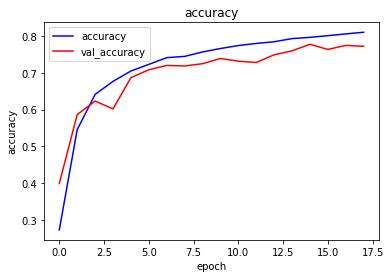

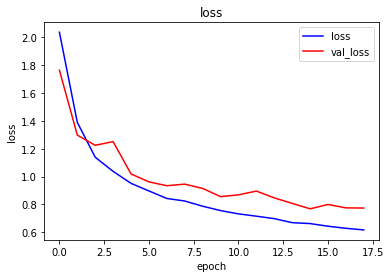

In [24]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [25]:
test_loss, test_acc = model.evaluate(test_gray_imgs, test_y, verbose=False)
print(f'test loss: {test_loss}')
print(f'test accuracy: {test_acc}')

test loss: 0.774295449256897
test accuracy: 0.7724723219871521


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [37]:
def get_CNN_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                                              input_shape=(32, 32, 1), activation='relu', padding='SAME'),
                                       tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='SAME'),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Dropout(0.3),
                                       tf.keras.layers.Dense(10, activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [39]:
cnn_model = get_CNN_model()
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                131136    
_________________________________________________________________
batch_normalization_4 (Batch (None, 64)                256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [40]:
checkpoint_best_only_cnn= get_checkpoint_best('checkpoints_best_only_cnn/checkpoint')

In [41]:
cnn_history = cnn_model.fit(train_gray_imgs, train_y, validation_data=(test_gray_imgs, test_y),
                    epochs=30, batch_size=256, verbose=2, callbacks=[early_stopping, checkpoint_best_only_cnn])

Epoch 1/30
287/287 - 2s - loss: 1.3315 - accuracy: 0.5659 - val_loss: 1.5216 - val_accuracy: 0.6704

Epoch 00001: val_accuracy improved from -inf to 0.67044, saving model to checkpoints_best_only_cnn/checkpoint
Epoch 2/30
287/287 - 1s - loss: 0.7275 - accuracy: 0.7807 - val_loss: 0.7621 - val_accuracy: 0.7794

Epoch 00002: val_accuracy improved from 0.67044 to 0.77939, saving model to checkpoints_best_only_cnn/checkpoint
Epoch 3/30
287/287 - 1s - loss: 0.6420 - accuracy: 0.8049 - val_loss: 0.6853 - val_accuracy: 0.7958

Epoch 00003: val_accuracy improved from 0.77939 to 0.79583, saving model to checkpoints_best_only_cnn/checkpoint
Epoch 4/30
287/287 - 1s - loss: 0.6026 - accuracy: 0.8174 - val_loss: 0.6106 - val_accuracy: 0.8190

Epoch 00004: val_accuracy improved from 0.79583 to 0.81899, saving model to checkpoints_best_only_cnn/checkpoint
Epoch 5/30
287/287 - 1s - loss: 0.5634 - accuracy: 0.8277 - val_loss: 0.5892 - val_accuracy: 0.8241

Epoch 00005: val_accuracy improved from 0.8189

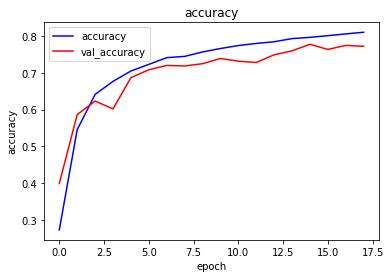

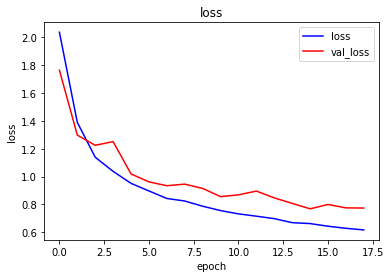

In [42]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [43]:
test_loss, test_acc = cnn_model.evaluate(test_gray_imgs, test_y, verbose=False)
print(f'test loss: {test_loss}')
print(f'test accuracy: {test_acc}')

test loss: 0.5286177396774292
test accuracy: 0.8491856455802917


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [44]:
def get_model_best_epoch(model, path):
    latest_checkpoint = tf.train.latest_checkpoint(path)
    model.load_weights(latest_checkpoint)
    return model

In [ ]:
model_last_epoch_MLP = get_model_best_epoch(get_model(), 'checkpoints_best_only/')
model_last_epoch_CNN = get_model_best_epoch(get_CNN_model(), 'checkpoints_best_only_cnn/')

In [49]:
inx = np.random.choice(test_gray_imgs.shape[0], 5)
print(f'random indexs: {inx}')

random_test_images = test_gray_imgs[inx, ...]
random_test_labels = test_y[inx, ...]
print(f'random test images shape: {random_test_images.shape}')
print(f'random test labels shape: {random_test_labels.shape}')
print(f'test labels are: \n{random_test_labels} \n')

MLP_predictions = model_last_epoch_MLP.predict(random_test_images)
MLP_predictions_list = [np.argmax(pred) for pred in MLP_predictions]
print(f'MLP model prediction: {MLP_predictions_list}')

CNN_predictions = model_last_epoch_CNN.predict(random_test_images)
CNN_predictions_list = [np.argmax(pred) for pred in CNN_predictions]
print(f'CNN model prediction: {CNN_predictions_list}')

random indexs: [15942 14836 12668  4389  2527]
random test images shape: (5, 32, 32, 1)
random test labels shape: (5, 1)
test labels are: 
[[1]
 [1]
 [2]
 [4]
 [7]] 

MLP model prediction: [1, 1, 2, 1, 7]
CNN model prediction: [1, 1, 2, 4, 7]


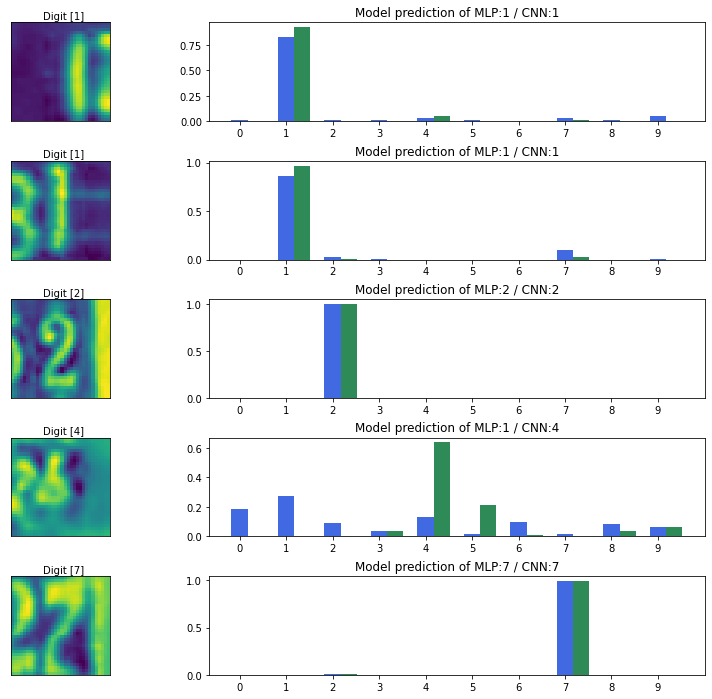

In [50]:

ind = np.arange(len(MLP_predictions[0]))  # the x locations for the groups
width = 0.35 

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (CNN_predictions, MLP_predictions, image, label) in \
 enumerate(zip(CNN_predictions, MLP_predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')

    axes[i, 1].bar(ind, MLP_predictions,width, color='royalblue', label='MLP')
    axes[i, 1].bar(ind+width, CNN_predictions,width, color='seagreen',label='CNN')
    
    axes[i, 1].set_xticks(ind)
    axes[i, 1].set_title("Model prediction of MLP:{} / CNN:{}"\
                         .format(np.argmax(MLP_predictions), np.argmax(CNN_predictions)))
    

plt.show()